#### Notebook Description

This notebook generates Figure 5 of the manuscript "Arbitrage-Free Implied Volatility Surface Generation1with Variational Autoencoders", which are scatter plots of the three regimes from (a) fitting to test data, and(b) random sample from the generative model, using the CTMC model on AUD-USD data with different colours represent three different regimes.

In [1]:
import torch
from helpers import load_net, sample_latent_based, scatter_data, gen_curves
import pickle
import pandas as pd
import numpy as np

This section loads the training set days and the corresponding fitted data from a precomputed data file and normalizes the data.

In [2]:
# Load training data
with open('Data/AUD_fitted_params.pickle', 'rb') as handle:
    params = pickle.load(handle)
# Load training days
with open('all_cur_train_valid_days_new.pickle', 'rb') as handle:
    train_days = pickle.load(handle)['train']

# Create tensor with appropriate days and compute transformation mean and variance
train_params = []
ts = np.array(params['keys'])
params = params['values']
for day in train_days:
    train_params.append(torch.squeeze(params[np.where(ts==pd.Timestamp(day[:10]))]))
train_params = torch.vstack(train_params)
train_mean = torch.mean(train_params, dim=0)
train_std = torch.std(train_params, dim=0)
train_norm = (train_params - train_mean)/train_std

We then load the CTMC-VAE for the AUD-USD currency pair, sample 1,000 sets of parameters and plot only the $\mu$ and $\sigma$ values for each of the 3 regimes (represented as a different color). This is Figure 5(a) from the manuscript.

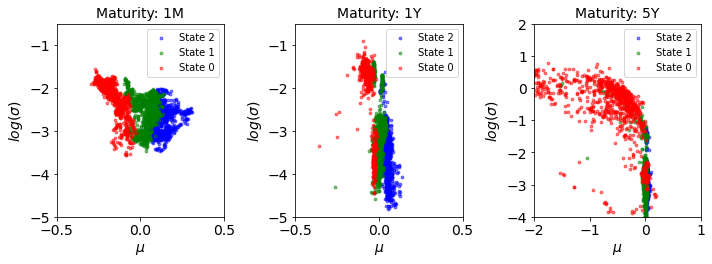

In [3]:
# Load network, sample, and convert to mu and log sigma scales and plot
AUD_vae = load_net('Networks/For Graphics/AUD_VAE/', 3, 8, train_mean, train_std)
AUD_samps = sample_latent_based(train_norm, AUD_vae, 1000)
_, pi, mu, _, sig, _, _, _ = gen_curves(AUD_samps, "", plot=False)
scatter_data(mu,np.log(sig), r"$\mu$", r"$log(\sigma)$", 'Networks/For Graphics/AUD_VAE/', save = True,file_name='sample_params.jpg', tau_idx=[0, 5, 7])

Finally we compare the generated parameters with the actual fitted CTMC parameters from the training set. This is Figure 5(b) from the manuscript.

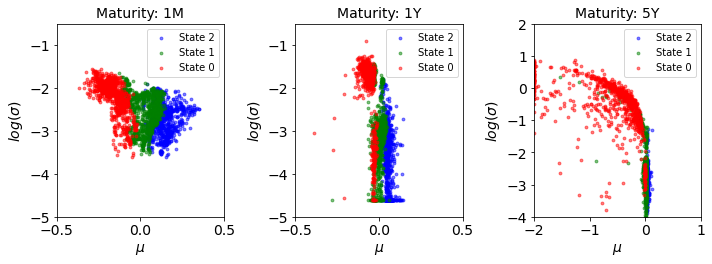

In [4]:
# Plot actual fitted parameters
_, pi, mu, _, sig, _, _, _ = gen_curves(train_params, "", plot=False)
scatter_data(mu,np.log(sig), r"$\mu$", r"$log(\sigma)$", 'Networks/For Graphics/AUD_VAE/', save = True,file_name='train_params.jpg', tau_idx=[0, 5, 7])